# predcting the rent of the house

# problem statement
The objective is to predict the rent value of houses based on varoius factors



# dataset
The dataset used in this project was obtained from kaggle thereforeTo build a house rent prediction system,
we need data based on the factors affecting the rent of a housing property which include

*BHK: Number of Bedrooms, Hall, Kitchen.

*Rent: Rent of the Houses/Apartments/Flats.

*Size: Size of the Houses/Apartments/Flats in Square Feet.

*Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground 
out of 2, 3 out of 5, etc.)

*Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or 
Build Area.

*Area Locality: Locality of the Houses/Apartments/Flats.

*City: City where the Houses/Apartments/Flats are Located.

*Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

*Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

*Bathroom: Number of Bathrooms.

*Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


# Tools preparation

pandas and numpy for data analysis and exploration

seaborn and matplotlib fot data visualization

linearRegression for building a model

mean_squared_error for metrics purposes


# loading libraries

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# loading dataset

In [46]:
import pandas as pd
df=pd.read_csv("House_Rent_Dataset.csv")
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [47]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


# checking the number of rows and columns

In [48]:
df.shape

(4746, 12)

# checking the columns names

In [49]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

# value_counts for columns

In [50]:
df["BHK"].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

In [51]:
df["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [52]:
df["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [53]:
df["Furnishing Status"].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [54]:
df["Tenant Preferred"].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [55]:
df["Bathroom"].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

In [56]:
df["Point of Contact"].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

# data analysis

In [57]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


# checking for the datatypes

In [59]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

# checking for the null values

<AxesSubplot:>

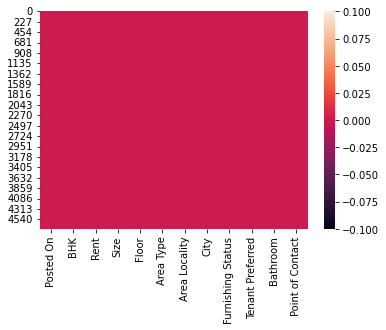

In [60]:
sns.heatmap(df.isna())

# data visualization using pandas,seaborn,matplotlib
exploring the data to check if there is relationship between the explonatory variables and the target variable.

In [61]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")


<AxesSubplot:xlabel='City', ylabel='count'>

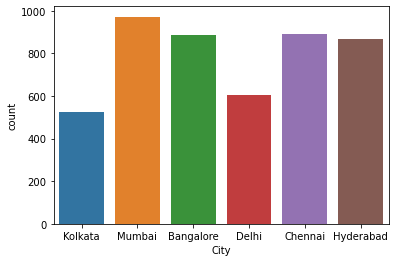

In [62]:
sns.countplot(x="City",data=df)

<AxesSubplot:xlabel='Furnishing Status', ylabel='count'>

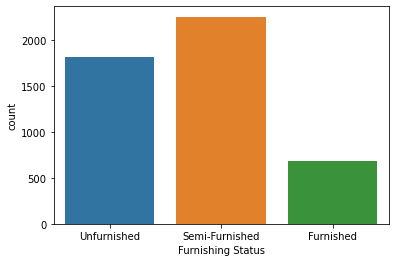

In [63]:
sns.countplot(x="Furnishing Status",data=df)

<AxesSubplot:xlabel='Tenant Preferred', ylabel='count'>

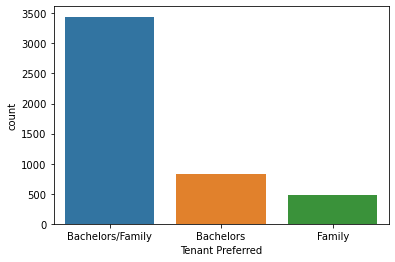

In [64]:
sns.countplot(x="Tenant Preferred",data=df)

<AxesSubplot:xlabel='Bathroom', ylabel='count'>

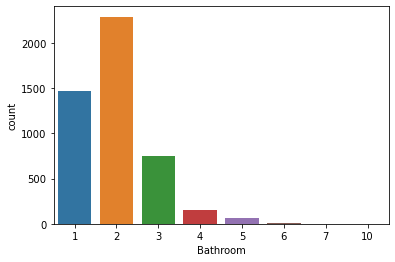

In [65]:
sns.countplot(x="Bathroom",data=df)

<AxesSubplot:xlabel='City', ylabel='count'>

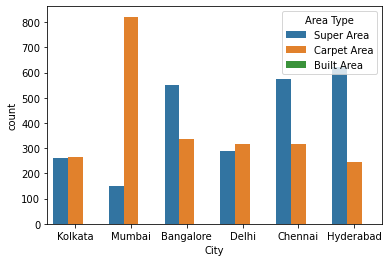

In [66]:
sns.countplot(x="City",data=df,hue="Area Type")

<AxesSubplot:xlabel='Area Type', ylabel='count'>

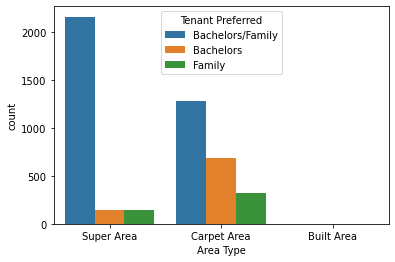

In [67]:
sns.countplot(x="Area Type",data=df,hue="Tenant Preferred")

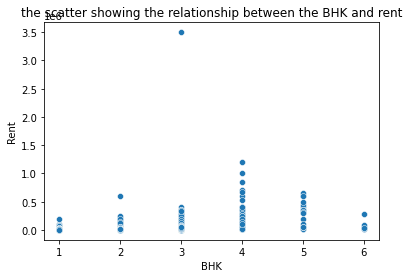

In [68]:
sns.scatterplot('BHK','Rent',data=df)
plt.title("the scatter showing the relationship between the BHK and rent")
plt.show()

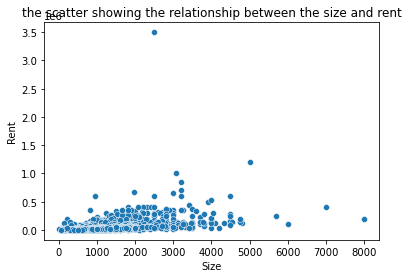

In [69]:
sns.scatterplot('Size','Rent',data=df)
plt.title("the scatter showing the relationship between the size and rent")
plt.show()

# feature encoding
most of the columns in the dataset are categorical we convert the categorical  features to numerical features for efficient modelling through label encoder from scikit learn

In [73]:
from sklearn.preprocessing import LabelEncoder
x={"Floor","Area Type","Area Locality","City","Furnishing Status","Tenant Preferred","Point of Contact"}
le=LabelEncoder()
for columns in x:
    df[columns]=le.fit_transform(df[columns])

In [74]:
df.head(7)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,455,2,221,4,2,1,2,2
1,2022-05-13,2,20000,800,14,2,1527,4,1,1,1,2
2,2022-05-16,2,17000,1000,14,2,1760,4,1,1,1,2
3,2022-07-04,2,10000,800,10,2,526,4,2,1,1,2
4,2022-05-09,2,7500,850,10,1,1890,4,2,0,1,2
5,2022-04-29,2,7000,600,447,2,1975,4,2,1,2,2
6,2022-06-21,2,10000,700,458,2,1184,4,2,0,2,0


# correlation
the correlation shows the relationship between features



Text(0.5, 1.0, 'the correlation shows the relationship between features')

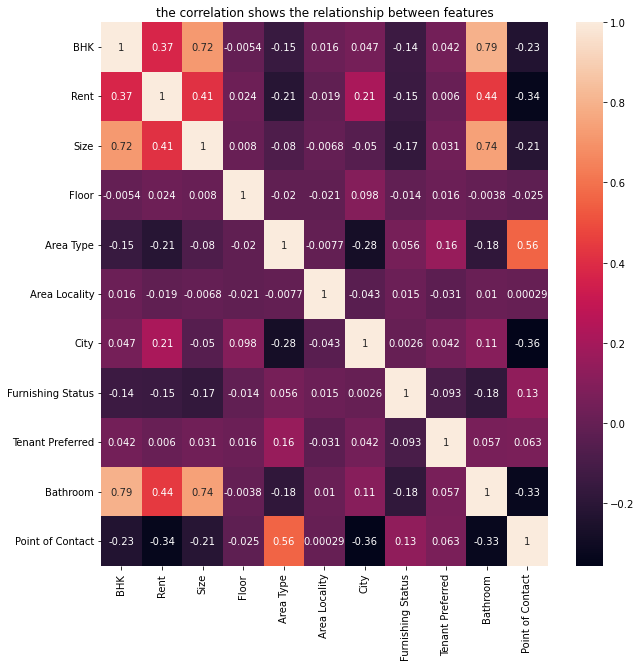

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("the correlation shows the relationship between features")

# modelling
house rent prediction is a regression problem where i used linear regression to create a model

In [82]:
#splitting the data into x and y train
x=df.drop(["Posted On","Rent"],axis=1).values

In [83]:
y=df["Rent"].values

In [84]:
#getting the shape of x and y
x.shape

(4746, 10)

In [86]:
y.shape

(4746,)

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature scalling
we need to scale the data so as to handle the skew features where each feature will have a mean of 0 and a variance of 1 bringing all the features to the same magnitude

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rescaledx_train=scaler.fit_transform(x_train)
rescaledx_test=scaler.fit_transform(x_test)

# linear regression

In [99]:
lr=LinearRegression()
lr.fit(rescaledx_train,y_train)


LinearRegression()

In [100]:
from sklearn.metrics import mean_squared_error
def mtrc(y_test,y_pred):
    results=np.sqrt(mean_squared_error(y_test,y_pred))
    return results

In [101]:
def r2score(model):
    score=model.score(rescaledx_test,y_test)
    return score


In [102]:
r2score(lr)

0.4601475934587913

In [103]:
y_pred=lr.predict(rescaledx_test)


In [104]:
mtrc(y_test,y_pred)

46384.455317059816